### What is Phishing ?
It is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by pretending as a reputable entity or person via email or other communication channel means

Phishing is popular among attackers, since it is easier to trick someone into clicking a malicious link which seems legitimate

The URL of phishing websites may be very similar to real websites to the human eye, but they are different in IP.

Domain name portion is constrained since it has to be registered with a domain name Registrar <br>
Subdomain name and Path are fully controllable by the phisher

# Import the Dataset and Libraries

In [1]:
# !pip install git+https://github.com/albertbup/deep-belief-network.git

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.metrics import accuracy_score

import joblib

In [3]:
# Loading the dataset
df= pd.read_csv("dataset_phishing.csv")

## Inspect the dataset

In [4]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


outliers at max values: nb_dots, nb_hyphens, nb_at, nb_qm, nb_and,nb_eq, domain_registration_length, domain_age <br>
target = legitimate/phishing

In [7]:
df.shape

(11430, 89)

In [8]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [9]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [10]:
# checking unique values and counts from the collected object features
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

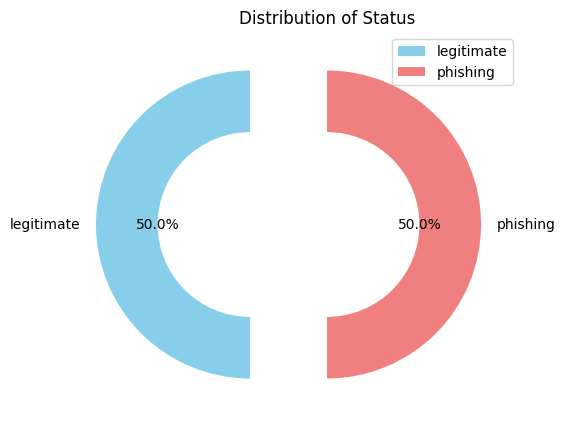

In [11]:
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed


status_counts = df['status'].value_counts()
colors = ['skyblue', 'lightcoral']
explode = (0.5, 0)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), explode=explode, colors=colors)
plt.title("Distribution of Status")

# Add legend
plt.legend(status_counts.index, loc="best")

plt.show()

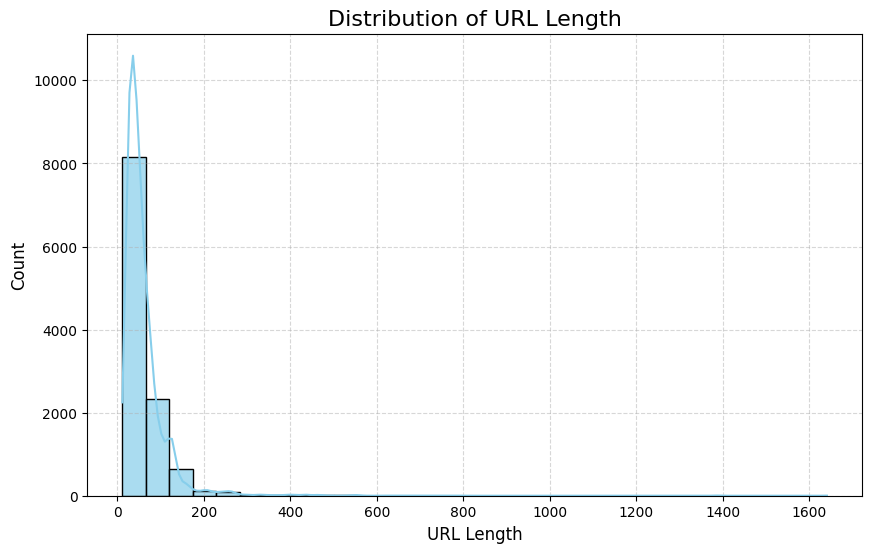

In [12]:
# Distribution of URL length
plt.figure(figsize=(10, 6))
sns.histplot(df['length_url'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of URL Length', fontsize=16)
plt.xlabel('URL Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The distribution is right-skewed, meaning there are more short URLs than long ones. This is a common finding in web data, as many website URLs are relatively short.<br>
The most frequent URL length is around 200 characters. <br>
There is a long tail of URLs with lengths ranging from 400 to 1600 characters. This suggests that some websites use much longer URLs than others.

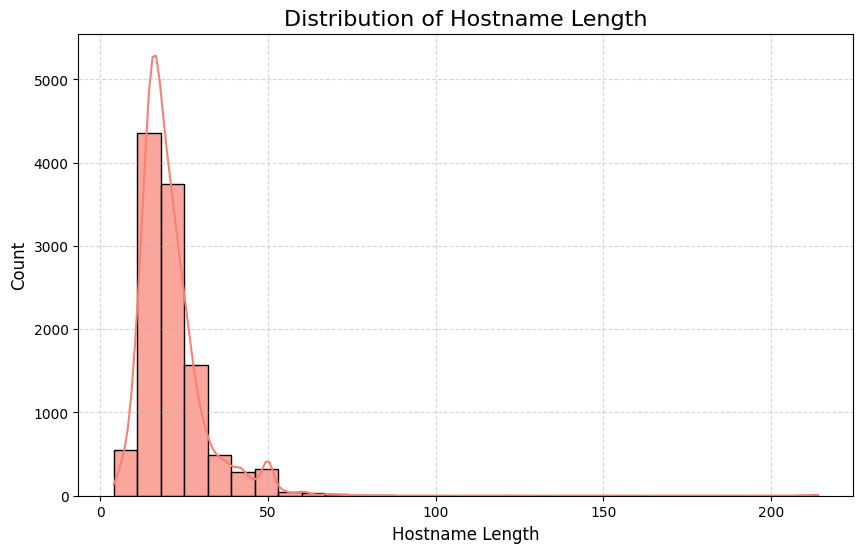

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['length_hostname'], bins=30, kde=True, color='salmon', alpha=0.7)
plt.title('Distribution of Hostname Length', fontsize=16)
plt.xlabel('Hostname Length', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The distribution is right-skewed, meaning there are more short hostnames than long ones. This is a common finding in web data, as many website hostnames are relatively short and descriptive. <br>
The most frequent hostname length is around 10 characters. <br>
There is a long tail of hostnames with lengths ranging from 20 to 80 characters. This suggests that some websites use longer and more complex hostnames, possibly for specific functionalities or branding purposes.

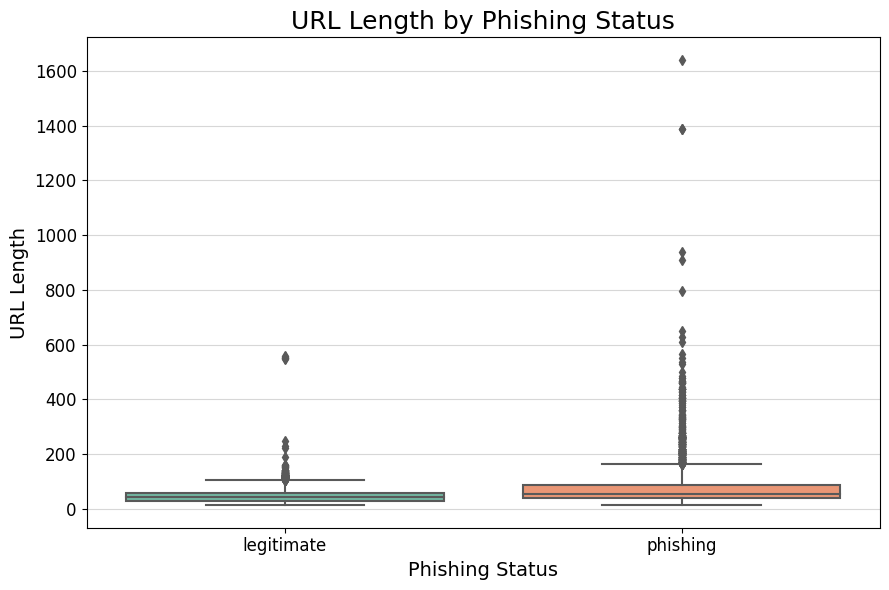

In [14]:
# Boxplot of URL length by phishing status
plt.figure(figsize=(9, 6))
sns.boxplot(x='status', y='length_url', data=df, palette='Set2')
plt.title('URL Length by Phishing Status', fontsize=18)
plt.xlabel('Phishing Status', fontsize=14)
plt.ylabel('URL Length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

The median URL length is slightly shorter for legitimate URLs compared to phishing URLs. 

This suggests that, in this dataset, shorter URLs are generally more likely to be legitimate.

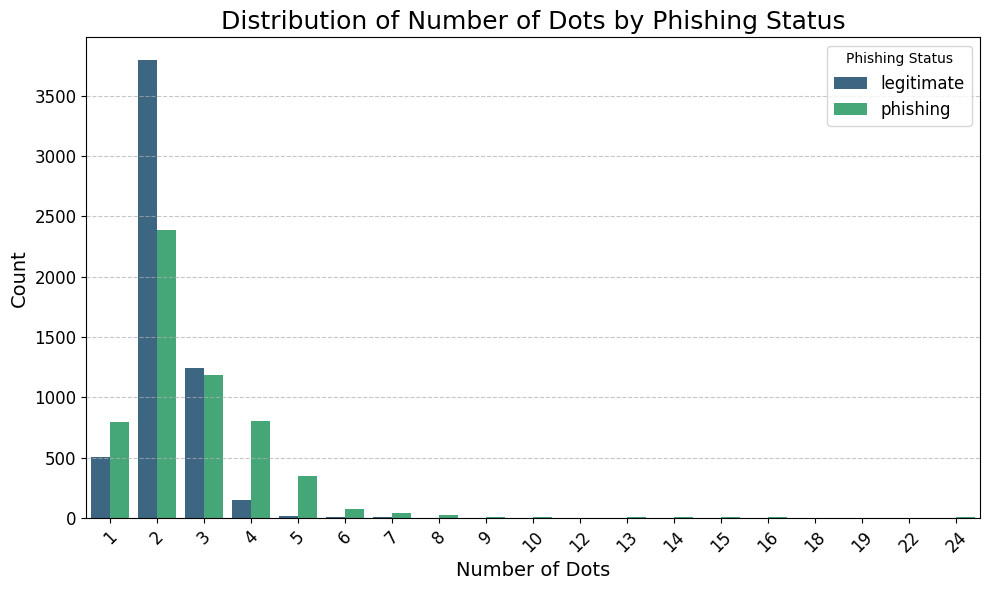

In [15]:
# Bar Chart with Multiple Categories (example: distribution of nb_dots based on phishing status)
plt.figure(figsize=(10, 6))
sns.countplot(x='nb_dots', hue='status', data=df, palette='viridis')
plt.title('Distribution of Number of Dots by Phishing Status', fontsize=18)
plt.xlabel('Number of Dots', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Phishing Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

For almost all values of "nb_dots," there are more legitimate URLs than phishing URLs. 

 suggests that, in this dataset, URLs with a higher number of dots are generally less likely to be phishing attempts.

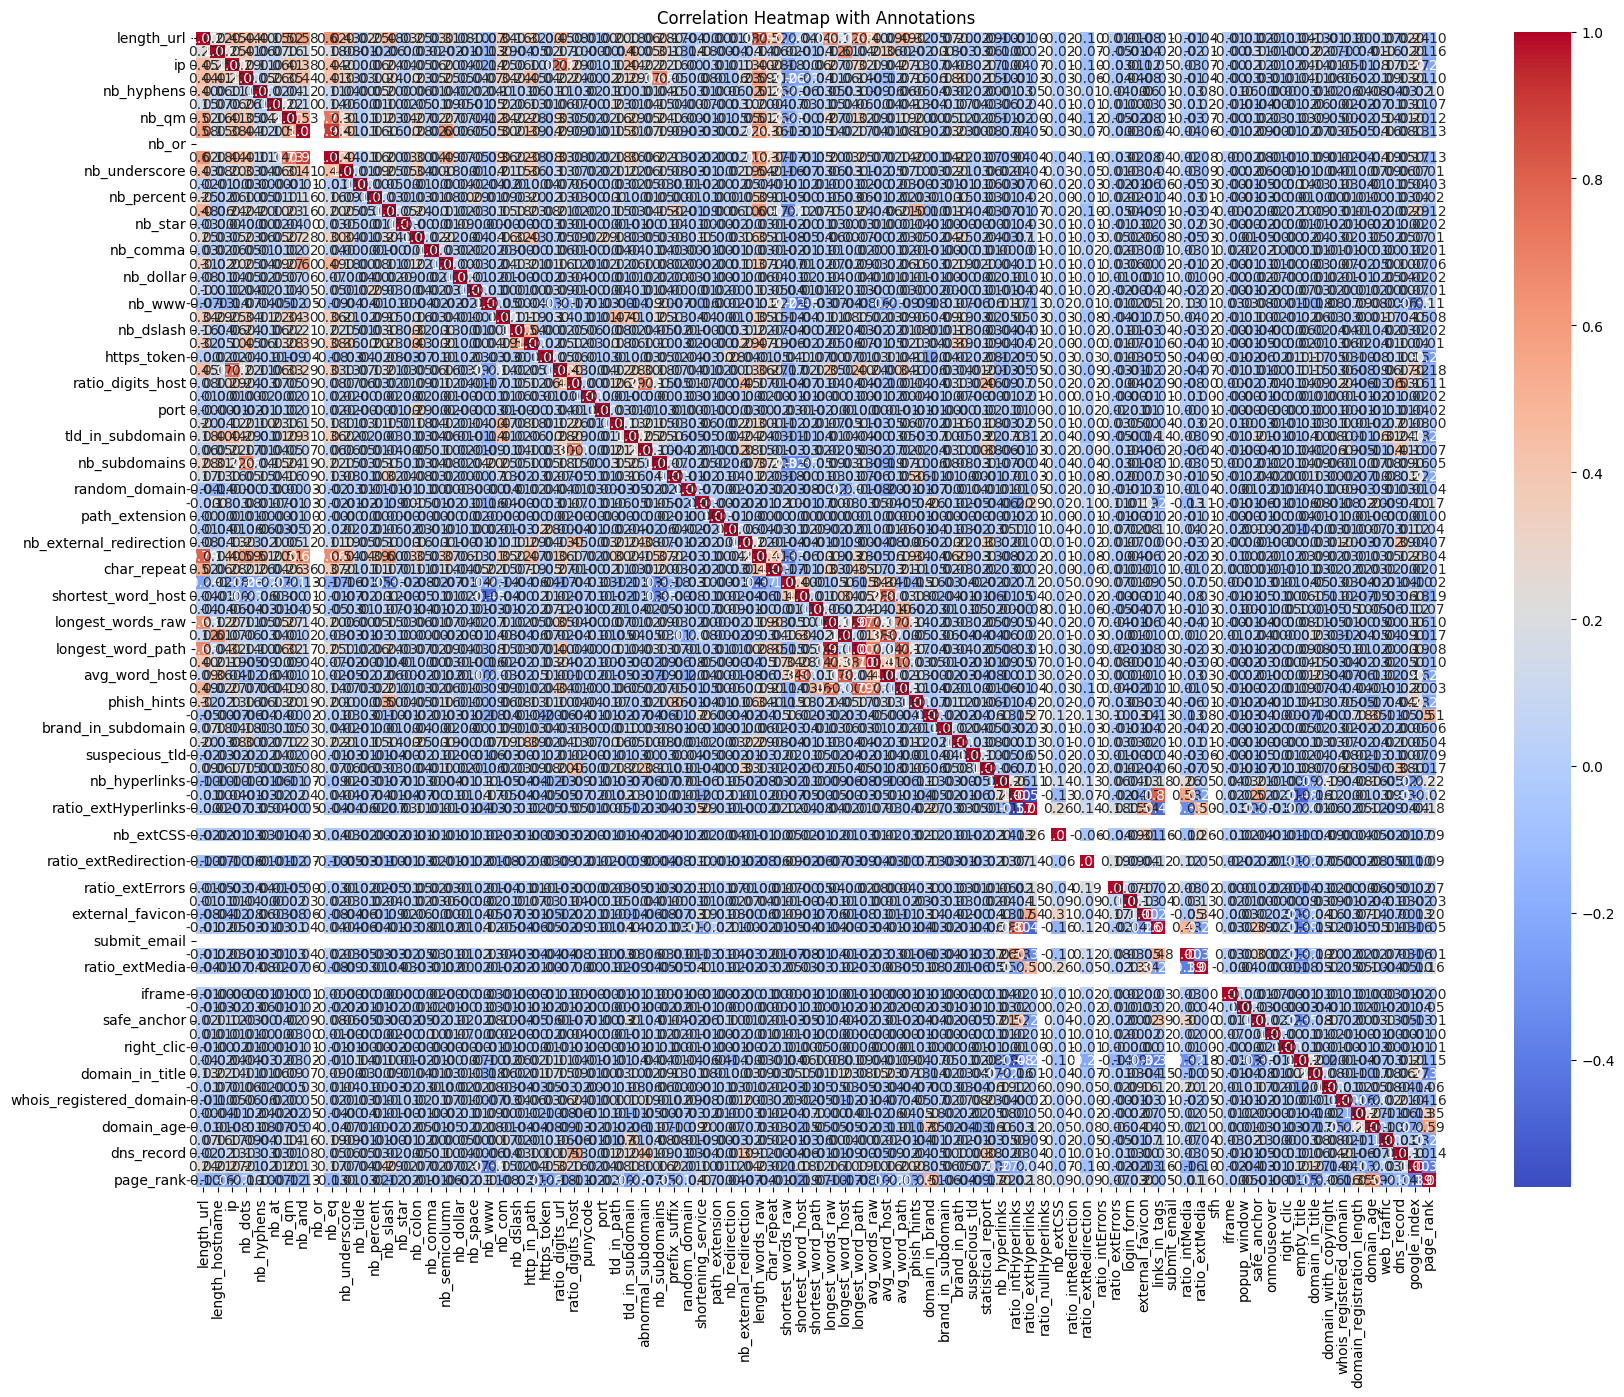

In [16]:
# Heatmap of Correlation with Annotations
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap with Annotations')
plt.show()

In [17]:
# Filter correlation matrix to retain only highly positive correlations (above 0.7)
highly_positive_corr = df.corr() > 0.7
filtered_corr = df.corr().where(highly_positive_corr)
positive_correlations = filtered_corr.stack()[filtered_corr.stack() > 0.7].index
for feature_pair in positive_correlations:
    feature1, feature2 = feature_pair
    correlation = filtered_corr.loc[feature1, feature2]
    if feature1 != feature2:
        print(f"{feature1} and {feature2}: {correlation:.2f}")

length_url and length_words_raw: 0.79
ip and ratio_digits_url: 0.77
nb_qm and nb_eq: 0.73
nb_and and nb_eq: 0.91
nb_eq and nb_qm: 0.73
nb_eq and nb_and: 0.91
ratio_digits_url and ip: 0.77
ratio_digits_host and abnormal_subdomain: 0.70
abnormal_subdomain and ratio_digits_host: 0.70
length_words_raw and length_url: 0.79
shortest_word_host and avg_word_host: 0.80
longest_words_raw and longest_word_path: 0.97
longest_words_raw and avg_words_raw: 0.78
longest_words_raw and avg_word_path: 0.73
longest_word_host and avg_word_host: 0.82
longest_word_path and longest_words_raw: 0.97
longest_word_path and avg_words_raw: 0.70
longest_word_path and avg_word_path: 0.79
avg_words_raw and longest_words_raw: 0.78
avg_words_raw and longest_word_path: 0.70
avg_words_raw and avg_word_path: 0.73
avg_word_host and shortest_word_host: 0.80
avg_word_host and longest_word_host: 0.82
avg_word_path and longest_words_raw: 0.73
avg_word_path and longest_word_path: 0.79
avg_word_path and avg_words_raw: 0.73
ratio_

Few highly correlated features as one would expect.Nothing jumps out extraordinary here.

length_words_raw is expected to be highly correlated with length_url . Similar behaviour for other correlated feature pairs

In [18]:
likely_cat = {}
for var in df.iloc[:,1:].columns:
    likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.002 

num_cols = []
cat_cols = []
for col in likely_cat.keys():
    if (likely_cat[col] == False):
        num_cols.append(col)
    else:
        cat_cols.append(col)

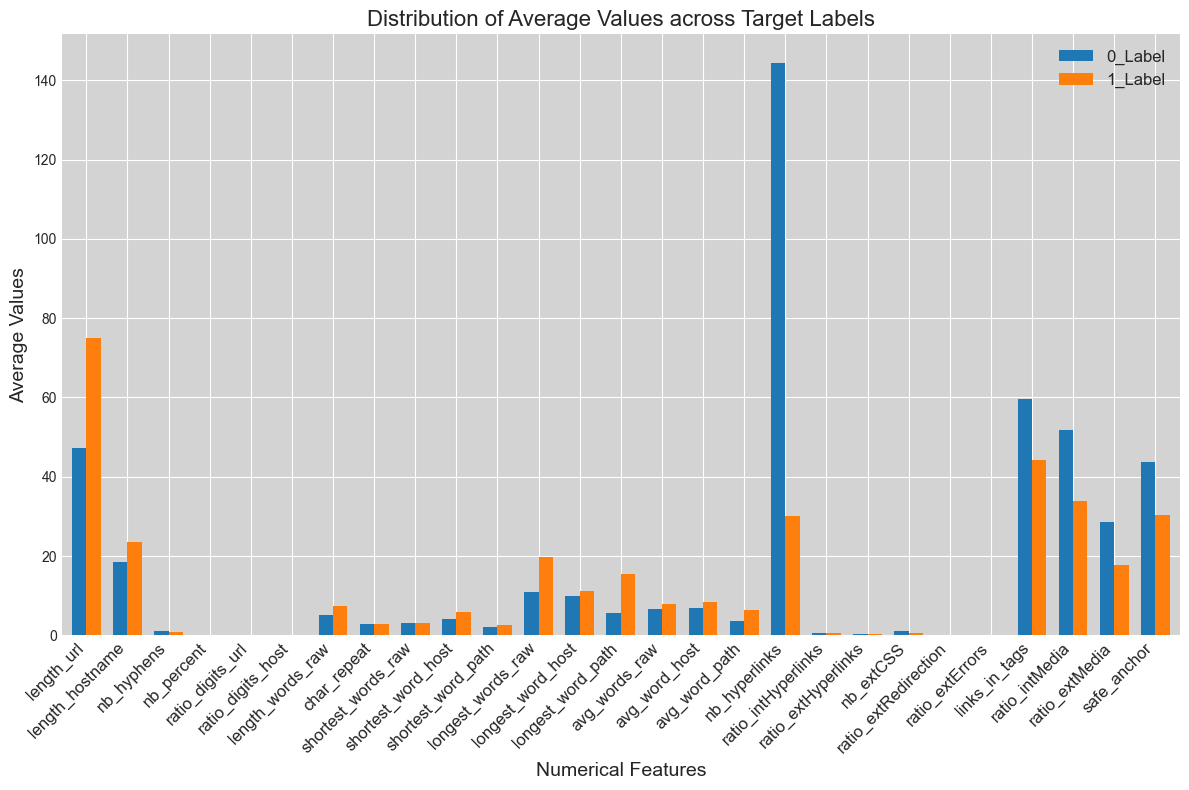

In [19]:
# Calculate the average values across target labels
df_distr = df.groupby('status')[num_cols].mean().reset_index().T
df_distr.rename(columns={0: '0_Label', 1: '1_Label'}, inplace=True)
plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = 'lightgrey'
fig, ax = plt.subplots(figsize=(12, 8))
df_distr[1:-3][['0_Label', '1_Label']].plot(kind='bar', ax=ax, width=0.7)
ax.set_title("Distribution of Average Values across Target Labels", fontsize=16)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
ax.legend(['0_Label', '1_Label'], fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Higher the length of URL ,or words in URL then more likely to be Phishing URL <br>
Clear distinctive pattern of nb_links field.Higher implies Legitimate URL <br>
links_in_tags ,safe_anchor higher volume signals more towards Legitmate site <br>

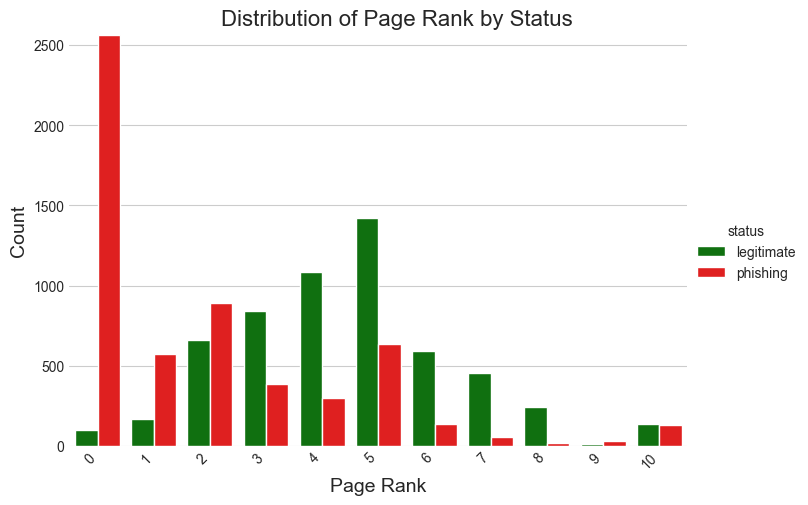

In [20]:
# Define the palette dictionary with colors for all labels
palette = {'legitimate': "green", 'phishing': "red"}
sns.set_style("whitegrid")
catplot = sns.catplot(x="page_rank", hue="status", data=df, kind="count", 
                      palette=palette, height=5.0, aspect=11.7/8.27)
catplot.fig.suptitle("Distribution of Page Rank by Status", fontsize=16)
catplot.set_xlabels("Page Rank", fontsize=14)
catplot.set_ylabels("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
# plt.legend(title="Status", loc="upper right")
plt.show()

The distribution of page rank differs between "legitimate" and "phishing" websites. <br>
Legitimate websites: <br>
Generally have a higher concentration in the higher page rank ranges, especially above 0.6. <br>
Show a gradual decrease in count as page rank decreases. <br>
Phishing websites: <br>
Have a higher concentration in the lower page rank ranges, particularly below 0.4. <br>
Show a steeper decrease in count as page rank decreases. <br>
This suggests that, in this dataset, higher page rank is associated with a higher likelihood of a website being legitimate. <br>

In [21]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [22]:
tokenizer.tokenize(df.url[0]) # this will fetch all the words from the first URL

['http', 'www', 'crestonwood', 'com', 'router', 'php']

In [23]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.url.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.5127895000000535 sec


In [24]:
stemmer = SnowballStemmer("english") # choose a language

In [25]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...


Time taken 1.9291891999998825 sec


In [26]:
df.sample(5)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed
9474,https://www.emerald-associates.com/images/stor...,125,26,1,3,5,0,0,0,0,...,0,183,8217,1509316,0,0,2,legitimate,"[https, www, emerald, associates, com, images,...","[https, www, emerald, associ, com, imag, stori..."
4130,http://jres6.weebly.com,23,16,0,2,0,0,0,0,0,...,0,246,5232,0,0,0,7,legitimate,"[http, jres, weebly, com]","[http, jres, weebli, com]"
3664,https://sites.google.com/site/fbconfirmaccoun18/,48,16,0,2,0,0,0,0,0,...,0,0,8348,1,0,1,10,phishing,"[https, sites, google, com, site, fbconfirmacc...","[https, site, googl, com, site, fbconfirmaccoun]"
2645,http://www.laptopmag.com/articles/dropbox-chro...,65,17,0,2,3,0,0,0,0,...,0,339,7330,2775,0,0,5,legitimate,"[http, www, laptopmag, com, articles, dropbox,...","[http, www, laptopmag, com, articl, dropbox, c..."
10178,http://www.webopedia.com/TERM/W/wireless_netwo...,74,17,0,3,0,0,0,0,0,...,0,617,8148,12761,0,0,6,legitimate,"[http, www, webopedia, com, TERM, W, wireless,...","[http, www, webopedia, com, term, w, wireless,..."


In [27]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.012260700000069846 sec


In [28]:
bad_sites = df[df.status == 'phishing']
good_sites = df[df.status == 'legitimate']

In [29]:
bad_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,0,-1,0,0,1,0,phishing,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,76,5767,0,0,1,2,phishing,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
13,http://html.house/l7ceeid6.html,31,10,0,2,0,0,0,0,0,...,66,1761,1173197,0,1,4,phishing,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [30]:
good_sites.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,170,7529,0,0,0,1,legitimate,"[http, www, mutuo, it]","[http, www, mutuo, it]",http www mutuo it
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,371,7298,0,0,0,5,legitimate,"[http, vamoaestudiarmedicina, blogspot, com]","[http, vamoaestudiarmedicina, blogspot, com]",http vamoaestudiarmedicina blogspot com


In [31]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,45,-1,0,1,1,4,legitimate,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,77,5767,0,0,1,2,phishing,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,14,4004,5828815,0,1,0,phishing,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,62,-1,107721,0,0,3,legitimate,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,224,8175,8725,0,0,6,legitimate,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park


Creating Model



CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [32]:
cv = CountVectorizer()

In [33]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [34]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainX, testX, trainY, testY = train_test_split(feature, df.status)

Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(trainX, trainY)

# Make predictions on training and testing data
train_preds = rf_classifier.predict(trainX)
test_preds = rf_classifier.predict(testX)


In [42]:
train_accuracy = accuracy_score(trainY, train_preds)
test_accuracy = accuracy_score(testY, test_preds)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9998833411105926
Testing Accuracy: 0.863890832750175


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit GridSearchCV to the training data
grid_search.fit(trainX, trainY)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [46]:
# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
train_preds = best_rf_model.predict(trainX)
test_preds = best_rf_model.predict(testX)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(trainY, train_preds)
test_accuracy = accuracy_score(testY, test_preds)

print("Training Accuracy (After Tuning):", train_accuracy)
print("Testing Accuracy (After Tuning):", test_accuracy)

Training Accuracy (After Tuning): 0.9986000933271115
Testing Accuracy (After Tuning): 0.9135759272218335


In [47]:
# Generate confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(testY, test_preds))

print("\nClassification Report:")
print(classification_report(testY, test_preds))


Confusion Matrix:
[[1290  140]
 [ 107 1321]]

Classification Report:
              precision    recall  f1-score   support

  legitimate       0.92      0.90      0.91      1430
    phishing       0.90      0.93      0.91      1428

    accuracy                           0.91      2858
   macro avg       0.91      0.91      0.91      2858
weighted avg       0.91      0.91      0.91      2858



In [50]:
from sklearn.metrics import roc_curve, auc
# Map class labels to binary values
testY_binary = testY.map({'legitimate': 0, 'phishing': 1})

# Get predicted probabilities for the positive class
y_probs = best_rf_model.predict_proba(testX)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(testY_binary, y_probs)
roc_auc = auc(fpr, tpr)

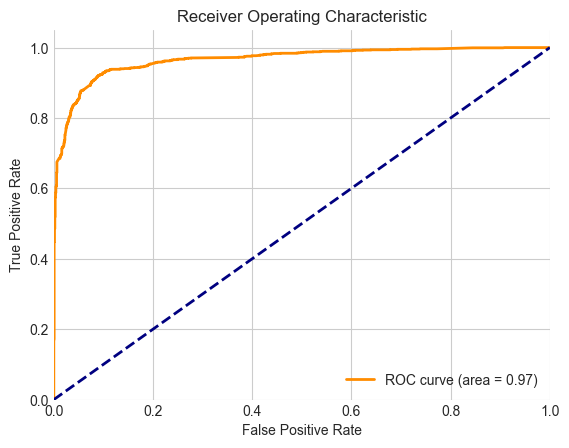

In [51]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Map class labels to binary values
testY_binary = testY.map({'legitimate': 0, 'phishing': 1})

# Convert predicted labels from strings to binary integers
test_preds_binary = [0 if label == 'legitimate' else 1 for label in test_preds]

# Calculate F1 score, precision, and recall
f1 = f1_score(testY_binary, test_preds_binary)
precision = precision_score(testY_binary, test_preds_binary)
recall = recall_score(testY_binary, test_preds_binary)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

print("\nClassification Report:")
print(classification_report(testY_binary, test_preds_binary))

F1 Score: 0.914503288335064
Precision: 0.9041752224503764
Recall: 0.9250700280112045

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1430
           1       0.90      0.93      0.91      1428

    accuracy                           0.91      2858
   macro avg       0.91      0.91      0.91      2858
weighted avg       0.91      0.91      0.91      2858



## Export the Model

In [40]:
import joblib

# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [41]:
# Load the trained model
lr_model = joblib.load('random_forest_model.pkl')

# Function to preprocess the input URL
def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    words_tokenized = tokenizer.tokenize(url)

    stemmer = SnowballStemmer("english")
    words_stemmed = [stemmer.stem(word) for word in words_tokenized]

    return ' '.join(words_stemmed)

# Function to make predictions
def predict_url_status(url):
    preprocessed_url = preprocess_url(url)
    feature = cv.transform([preprocessed_url])
    prediction = lr_model.predict(feature)[0]

    return prediction

In [48]:
url_to_predict = "http://vamoaestudiarmedicina.blogspot.com/"
prediction_result = predict_url_status(url_to_predict)

if prediction_result == 'phishing':
    print(f"The URL '{url_to_predict}' is predicted to be a phishing site.")
else:
    print(f"The URL '{url_to_predict}' is predicted to be a legitimate site.")

The URL 'http://vamoaestudiarmedicina.blogspot.com/' is predicted to be a legitimate site.


In [49]:
from sklearn.preprocessing import LabelEncoder

# Convert status labels to numerical values
label_encoder = LabelEncoder()
df['status_encoded'] = label_encoder.fit_transform(df['status'])

In [50]:
# Split the dataset
trainX, testX, trainY, testY = train_test_split(feature, df['status_encoded'], test_size=0.2, random_state=42)


#### DBN model

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

# Define the RBM model with 20 iterations
rbm = BernoulliRBM(n_iter=20, random_state=0, verbose=True)

# Define the Logistic Regression model
logistic = LogisticRegression(max_iter=10000)

# Create a pipeline combining RBM and Logistic Regression
dbn_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Training the DBN model
print("Training Deep Belief Network...")
t0 = time.time()
dbn_classifier.fit(trainX, trainY)
print("Training time:", time.time() - t0)

Training Deep Belief Network...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -250.76, time = 297.19s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -197.50, time = 319.99s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -140.81, time = 364.57s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -232.48, time = 271.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -176.66, time = 281.17s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -347.78, time = 268.11s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -131.67, time = 355.28s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -152.52, time = 303.38s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -131.86, time = 301.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -246.89, time = 303.60s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -298.59, time = 302.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -226.98, time = 293.61s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -151.06, time = 293.76s
[BernoulliRBM] Iteration 14,

In [52]:
# Evaluate the DBN model
print('Training Accuracy:', dbn_classifier.score(trainX.toarray(), trainY))
print('Testing Accuracy:', dbn_classifier.score(testX.toarray(), testY))

Training Accuracy: 0.5015310586176728
Testing Accuracy: 0.49387576552930884


In [63]:
# Obtain accuracy score for DBN classifier
dbn_accuracy = dbn_classifier.score(testX, testY)
print("DBN Accuracy", dbn_accuracy)

DBN Accuracy 0.49387576552930884


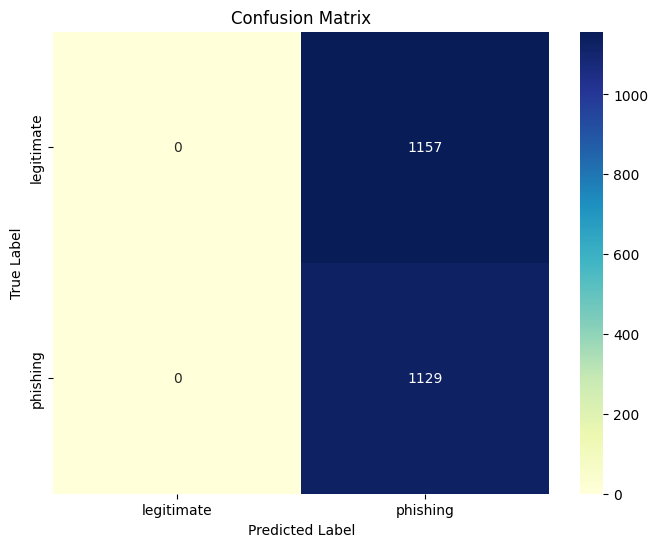

In [53]:
from sklearn.metrics import confusion_matrix

# Predictions on the test set
predictions = dbn_classifier.predict(testX)

# Generate confusion matrix
conf_matrix = confusion_matrix(testY, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
# Feature scaling
scaler = StandardScaler(with_mean=False)
scaled_trainX = scaler.fit_transform(trainX)
scaled_testX = scaler.transform(testX)

#### RBM model

In [56]:
# Create RBM model
rbm = BernoulliRBM(n_components=256, learning_rate=0.01, random_state=0, verbose=True, n_iter=20)

# Create logistic regression model for classification
logistic_classifier = LogisticRegression()

# Create a pipeline to combine RBM and Logistic Regression
rbm_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic_classifier)])

# Training the model
rbm_classifier.fit(scaled_trainX, trainY)

# Testing the model
rbm_accuracy = rbm_classifier.score(scaled_testX, testY)
Scores_ml['RBM'] = np.round(rbm_accuracy, 2)
print(f'RBM Testing Accuracy: {rbm_accuracy}')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -4264.04, time = 309.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -4057.74, time = 343.51s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -4104.86, time = 252.42s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -4688.81, time = 313.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -4321.34, time = 325.28s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -4377.39, time = 309.93s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -4257.64, time = 302.31s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -4837.03, time = 261.74s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -4474.40, time = 282.64s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -4391.39, time = 300.68s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -4008.27, time = 266.24s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -4558.44, time = 273.37s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4217.56, time = 279.95s
[BernoulliRBM] Iteration 14, pseudo-likelihood 

C:\Users\welcome\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [57]:
# Classification Report and Confusion Matrix
print('\nCLASSIFICATION REPORT\n')
print(classification_report(rbm_classifier.predict(scaled_testX), testY, target_names=['Bad', 'Good']))

con_mat_rbm = pd.DataFrame(confusion_matrix(rbm_classifier.predict(scaled_testX), testY),
                           columns=['Predicted:Bad', 'Predicted:Good'],
                           index=['Actual:Bad', 'Actual:Good'])


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.51      0.78      0.62       758
        Good       0.85      0.63      0.73      1528

    accuracy                           0.68      2286
   macro avg       0.68      0.71      0.67      2286
weighted avg       0.74      0.68      0.69      2286




CONFUSION MATRIX


<AxesSubplot:>

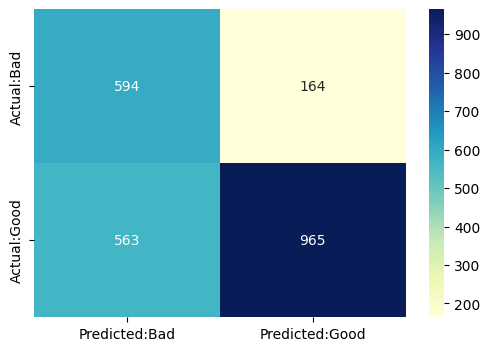

In [58]:
print('\nCONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat_rbm, annot=True, fmt='d', cmap="YlGnBu")

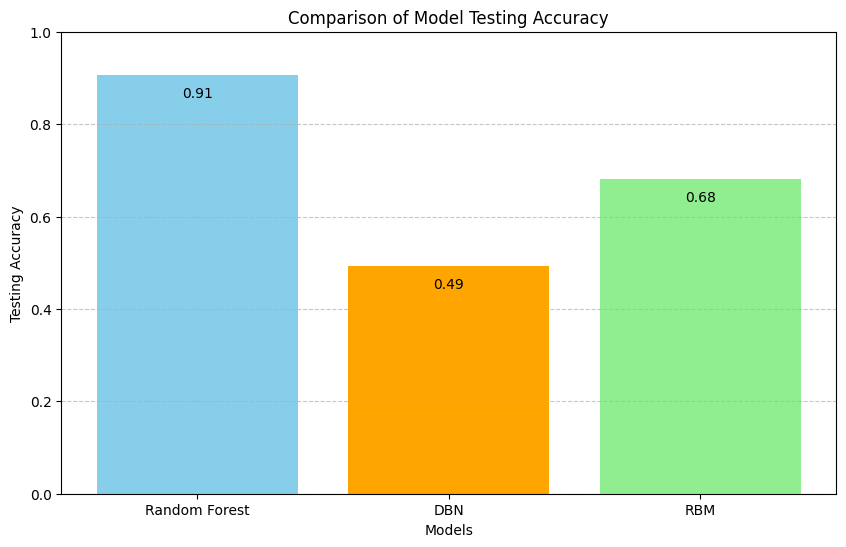

In [65]:
# Define the models and their corresponding accuracy scores
models = ['Random Forest', 'DBN', 'RBM']
accuracy_scores = [test_accuracy, dbn_accuracy, rbm_accuracy]

# Check for missing or invalid accuracy scores
valid_accuracy_scores = [score if score is not None and not np.isnan(score) else 0 for score in accuracy_scores]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, valid_accuracy_scores, color=['skyblue', 'orange', 'lightgreen'])

# Add labels to the bars
for bar, score in zip(bars, valid_accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.2f}', ha='center', color='black', fontsize=10)

plt.xlabel('Models')
plt.ylabel('Testing Accuracy')
plt.title('Comparison of Model Testing Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()